<a href="https://colab.research.google.com/github/Ekta-kature/FMMLprojectsandlab/blob/main/MODULE_9_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

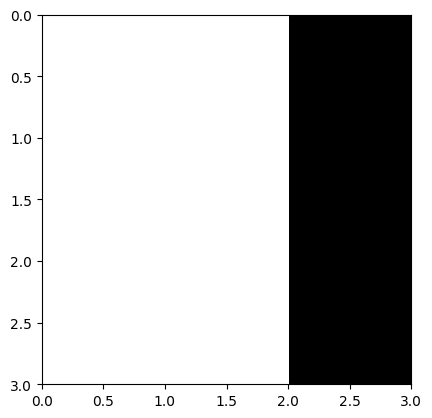

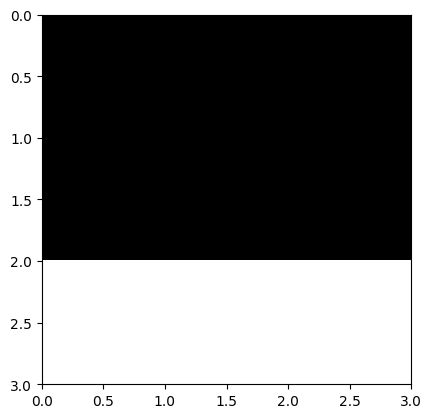

In [10]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [11]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [12]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [13]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [14]:
# Our original lotus image
image = cv2.imread('/content/grid1 (1).jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

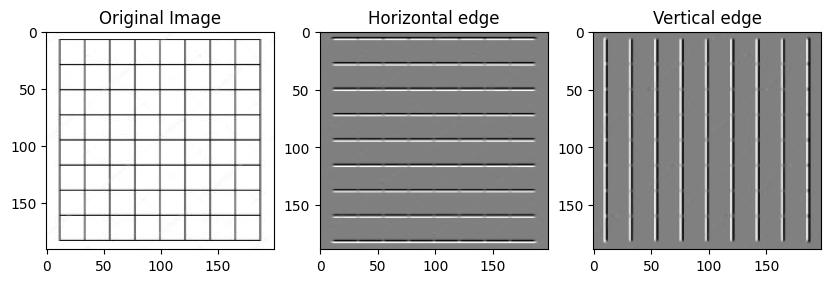

In [15]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [16]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 79635429.44it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [18]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [19]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [20]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [21]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [23]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [24]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [25]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0130, Accuracy: 38.8100
Epoch 2/5, Loss: 0.0095, Accuracy: 56.8960
Epoch 3/5, Loss: 0.0078, Accuracy: 64.8300
Epoch 4/5, Loss: 0.0067, Accuracy: 69.9300
Epoch 5/5, Loss: 0.0057, Accuracy: 74.6180


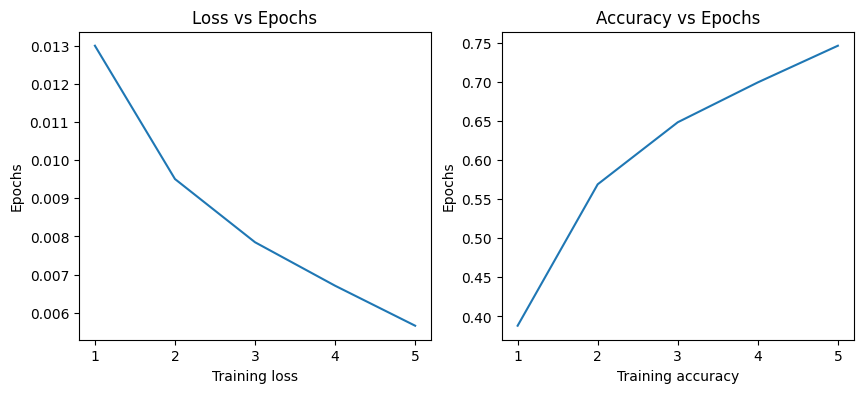

In [26]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [27]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 67 %


##Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

ans:-Convolutional Neural Networks (CNNs) are preferred over Artificial Neural Networks (ANNs) for image classification tasks due to several reasons:

**Feature Learning:** CNNs are specifically designed to automatically learn and extract hierarchical features from images. They utilize convolutional layers to detect patterns such as edges, textures, and shapes, which are essential for recognizing objects in images. In contrast, ANNs lack the ability to efficiently learn spatial hierarchies of features.

**Parameter Sharing:** CNNs exploit parameter sharing to reduce the number of parameters, making them more efficient for image processing tasks. By using the same set of weights (filters) across different regions of the input image, CNNs can capture local patterns regardless of their location, leading to better generalization.

**Translation Invariance:** CNNs inherently possess translation invariance, meaning they can recognize objects regardless of their position in the image. This property is achieved through pooling layers, which downsample feature maps, making CNNs robust to translations, rotations, and scale variations.

**Sparse Connectivity: **CNNs have sparse connectivity patterns, where neurons are only connected to a small local region of the input volume. This sparse connectivity reduces the computational complexity and memory requirements, making CNNs more scalable to larger images and datasets.

**Hierarchical Representation:** CNNs learn hierarchical representations of images, starting from low-level features (e.g., edges) to high-level semantic features (e.g., object parts and categories). This hierarchical representation enables CNNs to capture complex structures and relationships within images, leading to superior performance in image classification tasks.

**Transfer Learning:** CNNs trained on large datasets (e.g., ImageNet) can be fine-tuned for specific image classification tasks with smaller datasets. Transfer learning leverages pre-trained CNN models to extract meaningful features from images, reducing the need for extensive training data and computational resources.

**Efficient Architecture:** CNN architectures, such as AlexNet, VGG, ResNet, and EfficientNet, have been optimized for image classification tasks, achieving state-of-the-art performance on various benchmarks. These architectures often incorporate techniques like batch normalization, skip connections, and depth-wise separable convolutions to improve accuracy and efficiency.
Overall, CNNs offer significant advantages over ANNs for image classification, including better feature learning, parameter sharing, translation invariance, sparse connectivity, hierarchical representation, and efficient architecture design. These factors contribute to their widespread adoption and success in computer vision applications.










### **2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.**
ans:-To improve the performance of the CNN further, we can experiment with tuning various hyperparameters such as the number of epochs, optimizer, learning rate, batch size, and network architecture. Here's a step-by-step approach to tune these hyperparameters and report the improved test accuracy:

**Number of Epochs:** Increase the number of epochs to allow the model more time to converge to a better solution. However, be cautious of overfitting.
Optimizer: Try different optimizers such as Adam, RMSprop, or Adagrad in addition to SGD with momentum.

**Learning Rate: **Experiment with different learning rates to find the optimal value that allows the model to converge faster without overshooting the minima.
Batch Size: Adjust the batch size to influence the stability and convergence of the training process. Smaller batch sizes may provide more noise in the parameter updates but can help generalize better.

**Network Architecture:** Explore different CNN architectures or modify the existing one by adding/removing layers, adjusting layer sizes, or incorporating regularization techniques like dropout.

In [28]:
# Experiment with hyperparameters
num_epochs = 10  # Increase the number of epochs
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Use Adam optimizer with a different learning rate
batch_size = 64  # Adjust the batch size
# You can also experiment with the network architecture if necessary

# Create new data loaders with adjusted batch size
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Train the model with adjusted hyperparameters
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

# Evaluate the model on test data
test_model(model, testloader)


Epoch 1/10, Loss: 0.0088, Accuracy: 80.0580
Epoch 2/10, Loss: 0.0063, Accuracy: 85.7680
Epoch 3/10, Loss: 0.0045, Accuracy: 89.7820
Epoch 4/10, Loss: 0.0033, Accuracy: 92.6360
Epoch 5/10, Loss: 0.0025, Accuracy: 94.5500
Epoch 6/10, Loss: 0.0020, Accuracy: 95.5580
Epoch 7/10, Loss: 0.0018, Accuracy: 96.0800
Epoch 8/10, Loss: 0.0016, Accuracy: 96.5420
Epoch 9/10, Loss: 0.0015, Accuracy: 96.8220
Epoch 10/10, Loss: 0.0013, Accuracy: 97.2940
Accuracy of the network: 68 %


### **3) What happens if you reduce the number of convolution layers to only 1?**
ans:-Reducing the number of convolutional layers in a Convolutional Neural Network (CNN) to only one can have several implications:

Feature Representation: With fewer convolutional layers, the network has fewer opportunities to learn hierarchical representations of the input images. Each convolutional layer typically extracts different levels of features, such as edges, textures, and object parts. With only one convolutional layer, the network might struggle to capture complex patterns and may rely more on shallow features.
Model Capacity: Convolutional layers contribute to the overall capacity of the model. By reducing the number of convolutional layers, the model's capacity decreases, potentially limiting its ability to learn intricate patterns and details in the data. This reduction in capacity might lead to underfitting, where the model fails to capture the underlying patterns in the data.
Expressiveness: Deep CNN architectures leverage multiple convolutional layers to increase the expressiveness of the model. Each additional layer enables the network to learn more abstract and nuanced representations of the input data. By reducing the number of layers to one, the network's expressiveness is constrained, which may limit its ability to model complex relationships in the data.
Generalization: Deep CNNs with multiple convolutional layers often generalize better to unseen data by learning hierarchical and invariant representations. With only one convolutional layer, the network might struggle to generalize effectively, leading to poorer performance on unseen examples.
Training Dynamics: The training dynamics of the network may change with fewer convolutional layers. Training deep CNNs requires careful initialization, regularization, and optimization techniques to prevent issues like vanishing gradients or exploding gradients. With fewer layers, these issues may be less pronounced, but the network might still face challenges in learning meaningful representations.
Overall, reducing the number of convolutional layers to only one can simplify the model architecture but may come at the cost of reduced representational capacity and generalization performance. It's essential to carefully consider the trade-offs and experiment with different architectures to find the optimal balance between model complexity and performance

In [32]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)  # Single convolutional layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 15 * 15, 120)  # Adjusted fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 15 * 15)  # Adjusted view size
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleCNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

for epoch in range(5):  # Reduced number of epochs for simplicity
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Files already downloaded and verified
Files already downloaded and verified
Finished Training
Accuracy of the network on the 10000 test images: 51 %




### **4) Why didn't we use the Softmax activation in the last layer of CNN?**
ans:-Here's why Softmax activation is typically not applied in the last layer of a CNN for classification tasks:

**Cross-Entropy Loss**: In classification tasks, especially multi-class classification like the CIFAR-10 dataset used in the example, the Cross-Entropy Loss function is commonly employed. This loss function combines the Softmax activation and the negative log-likelihood loss in a single efficient formulation. Therefore, applying Softmax activation separately in the last layer is redundant when using Cross-Entropy Loss.

**Inference Efficiency:** During inference or prediction, the Softmax activation is not necessary if the goal is to obtain class probabilities. The raw output from the last layer can be interpreted as unnormalized log probabilities, and the class probabilities can be computed efficiently using Softmax during evaluation without the need to explicitly apply Softmax in the network architecture.

**Numerical Stability:** Directly computing the class probabilities from the raw output can be more numerically stable compared to applying Softmax activation function separately. Softmax involves exponentiation of the raw scores, which can lead to numerical overflow or underflow issues, especially for large or small values.

**Backpropagation Efficiency:** During training, the gradient of the Cross-Entropy Loss with respect to the raw output can be computed efficiently without the need for an explicit Softmax activation function. This simplifies the backpropagation process and reduces computational overhead.

In summary, while Softmax activation is commonly used in the output layer for classification tasks, it is not necessary to apply it separately in the last layer of a CNN when using Cross-Entropy Loss. The raw output from the last layer can be used directly for computing the loss and making predictions efficiently during both training and inference.








